<a href="https://colab.research.google.com/github/oktaviacitra/classification/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline(
    [
        ('scaler', StandardScaler()), 
        ('model', DecisionTreeClassifier(random_state=21))
    ]
)

In [ ]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', DecisionTreeClassifier(random_state=21))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': DecisionTreeClassifier(random_state=21),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__random_state': 21,
 'model__splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'model__splitter': ['best', 'random'],
              'model__criterion': ['gini', 'entropy', 'log_loss'],
              'model__min_samples_leaf': [1, 1.5, 2, 2.5, 3],
              'model__min_samples_leaf': [0.5, 1, 1.5],
              'model__min_weight_fraction_leaf': [0.0, 0.01, 0.001],
              'model__min_impurity_decrease': [0.0, 0.01],
              'model__ccp_alpha': [0.0099, 0.01, 0.0]
              }

search = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=3
)

search.fit(X, y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
900 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-package

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        DecisionTreeClassifier(random_state=21))]),
             n_jobs=-1,
             param_grid={'model__ccp_alpha': [0.0099, 0.01, 0.0],
                         'model__criterion': ['gini', 'entropy', 'log_loss'],
                         'model__min_impurity_decrease': [0.0, 0.01],
                         'model__min_samples_leaf': [0.5, 1, 1.5],
                         'model__min_weight_fraction_leaf': [0.0, 0.01, 0.001],
                         'model__splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
search.best_params_, search.best_estimator_

({'model__ccp_alpha': 0.0099,
  'model__criterion': 'gini',
  'model__min_impurity_decrease': 0.0,
  'model__min_samples_leaf': 1,
  'model__min_weight_fraction_leaf': 0.0,
  'model__splitter': 'best'},
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('model',
                  DecisionTreeClassifier(ccp_alpha=0.0099, random_state=21))]))

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)
X_train.shape, X_test.shape

((135, 4), (15, 4))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(ccp_alpha = 0.0099, criterion = 'gini',
                               min_impurity_decrease = 0.0,
                               min_samples_leaf = 1,
                               min_weight_fraction_leaf = 0.0,
                               splitter = 'best')
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0099)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      0.86      0.86         7
           2       0.67      0.67      0.67         3

    accuracy                           0.87        15
   macro avg       0.84      0.84      0.84        15
weighted avg       0.87      0.87      0.87        15



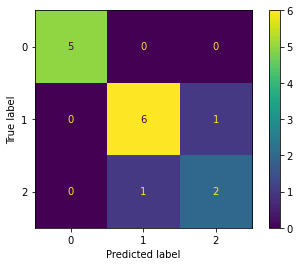

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()